# Linear Regression - California Houses Dataset


In [47]:
import sys
import os
sys.path.append('..')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.preprocessing import preprocess_houses_data
from src.models.linear_regression import LinearRegression
from src.utils.visualization import plot_training_curves, plot_predictions, plot_feature_importance

plt.style.use('seaborn-v0_8')
torch.manual_seed(42)
np.random.seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

X_train, X_test, y_train, y_test, feature_names = preprocess_houses_data('../data/California_Houses.csv', device=device)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Features: {X_train.shape[1]}")
print(f"Train samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"y_train range: {y_train.min().item():.2f} - {y_train.max().item():.2f}")
print(f"y_train mean: {y_train.mean().item():.2f}")



Device: cuda
X_train shape: torch.Size([16512, 24])
X_test shape: torch.Size([4128, 24])
y_train shape: torch.Size([16512])
y_test shape: torch.Size([4128])
Features: 24
Train samples: 16512
Test samples: 4128
y_train range: 14999.00 - 500001.00
y_train mean: 206935.38


In [48]:
learning_rate = 0.01
max_epochs = 1000

model = LinearRegression(
    learning_rate=learning_rate,
    max_epochs=max_epochs,
    device=device,
    reg_type='elasticnet',
    l1_lambda=1e-2,
    l2_lambda=1e-2,
    alpha=0.5
)

print(f"Learning rate: {learning_rate}")
print(f"Max epochs: {max_epochs}")

model.fit(X_train, y_train, X_test, y_test)
print(f"Epochs: {len(model.history['train_loss'])}")
print(f"Final train loss: {model.history['train_loss'][-1]:.4f}")
if model.history['val_metrics']:
    print(f"Final val R²: {model.history['val_metrics'][-1]['r2']:.4f}")
    print(f"Final val RMSE: {model.history['val_metrics'][-1]['rmse']:.4f}")

y_pred = model.predict(X_test)
test_metrics = model.score(X_test, y_test)

print(f"Test samples: {test_metrics['n']}")
print(f"Sum absolute errors: {test_metrics['sum_abs']:.4f}")
print(f"Sum squared errors: {test_metrics['sum_sq']:.4f}")
print(f"Test MSE: {test_metrics['mse']:.4f}")
print(f"Test MAE: {test_metrics['mae']:.4f}")
print(f"Test RMSE: {test_metrics['rmse']:.4f}")
print(f"Test R²: {test_metrics['r2']:.4f}")
if 'mape' in test_metrics:
    print(f"Test MAPE: {test_metrics['mape']:.4f}%")

baseline_pred = torch.full_like(y_test, y_train.mean())
baseline_mse = torch.mean((y_test - baseline_pred) ** 2).item()
baseline_mae = torch.mean(torch.abs(y_test - baseline_pred)).item()

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline MAE: {baseline_mae:.4f}")



Learning rate: 0.01
Max epochs: 1000
Epochs: 1000
Final train loss: 4247280128.0000
Final val R²: 0.6558
Final val RMSE: 67912.4062
Test samples: 4128
Sum absolute errors: 198404896.0000
Sum squared errors: 19038725996544.0000
Test MSE: 4612094464.0000
Test MAE: 48063.2031
Test RMSE: 67912.4062
Test R²: 0.6558
Test MAPE: 28.7850%
Baseline MSE: 13400008704.0000
Baseline MAE: 91583.6719


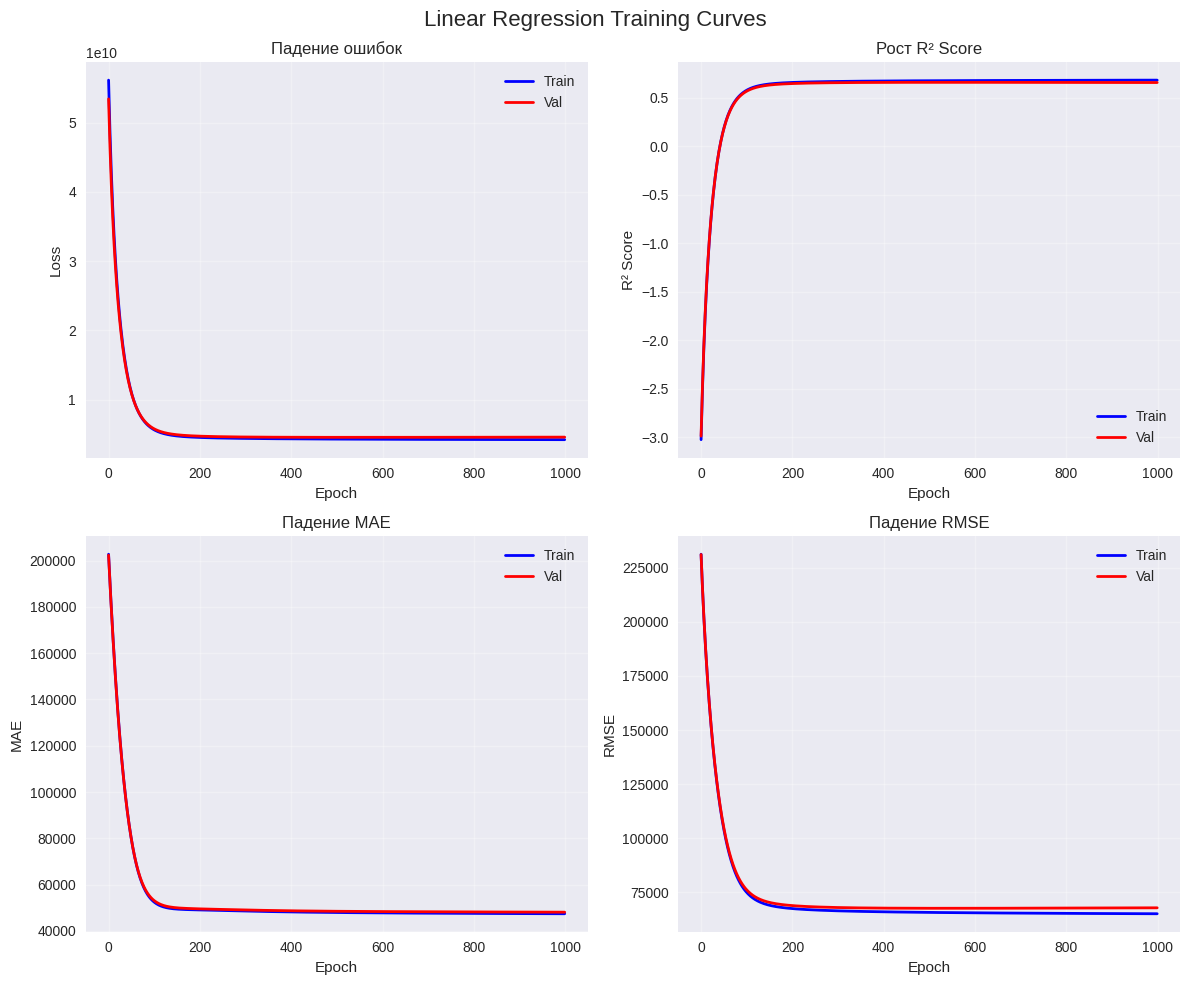

In [49]:
plot_training_curves(model.history, title="Linear Regression Training Curves", model_type="regression", max_epochs_display=1000)

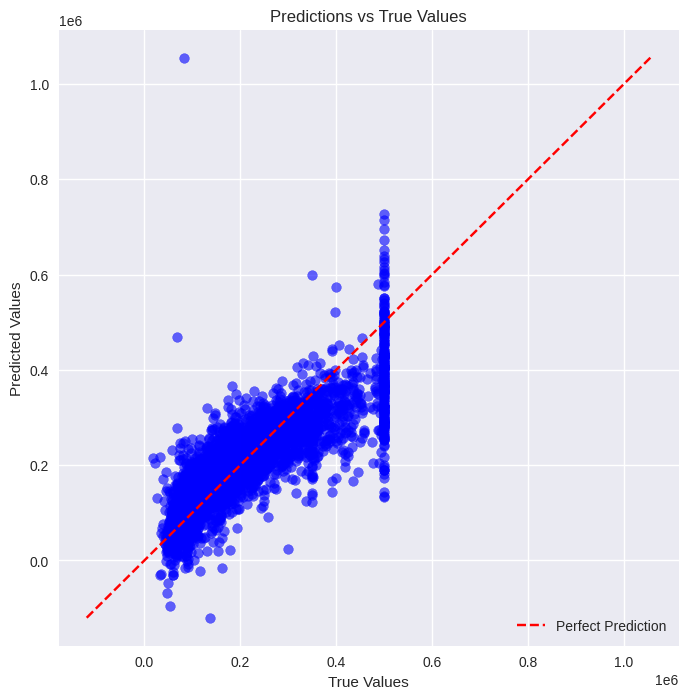

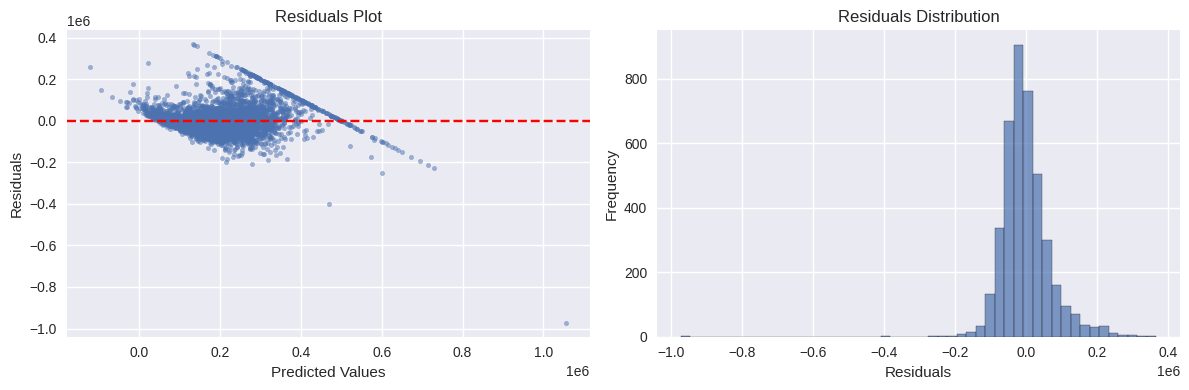

In [50]:
plot_predictions(y_test, y_pred, title="Predictions vs True Values")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
residuals = (y_test - y_pred).cpu().numpy()
plt.scatter(y_pred.cpu().numpy(), residuals, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()


                           Feature        Weight    Abs_Weight
0                    Median_Income  64305.238281  64305.238281
20                     LuxuryIndex  37387.054688  37387.054688
7                        Longitude -27868.246094  27868.246094
13               RoomsPerHousehold -27734.042969  27734.042969
9                   Distance_to_LA -24052.035156  24052.035156
4                       Population -22010.562500  22010.562500
15                    Spaciousness  16538.955078  16538.955078
8                Distance_to_coast -15063.902344  15063.902344
1                       Median_Age  12057.746094  12057.746094
5                       Households  11753.282227  11753.282227
19                  RoomEfficiency  10772.387695  10772.387695
14                 BedroomsPerRoom  10772.375977  10772.375977
3                     Tot_Bedrooms  10105.383789  10105.383789
23      Coastal_Income_Interaction   9242.880859   9242.880859
16               MinDistanceToCity  -8832.598633   8832

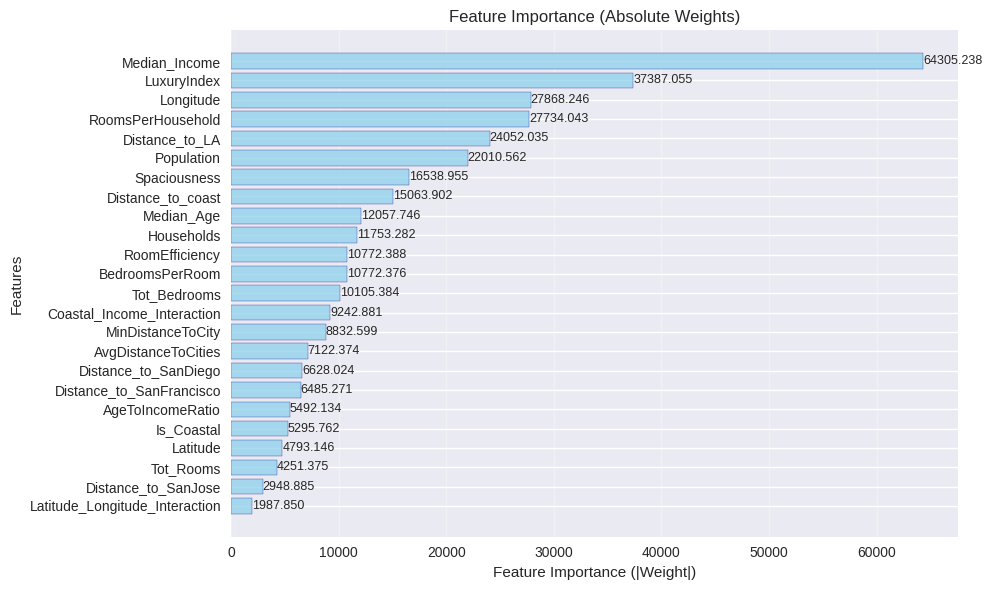


Соответствие признаков и весов:
  Latitude_Longitude_Interaction: -1987.8505
  Distance_to_SanJose: 2948.8845
  Tot_Rooms: 4251.3745
  Latitude: -4793.1460
  Is_Coastal: 5295.7617
  AgeToIncomeRatio: -5492.1338
  Distance_to_SanFrancisco: 6485.2705
  Distance_to_SanDiego: 6628.0239
  AvgDistanceToCities: -7122.3735
  MinDistanceToCity: -8832.5986
  Coastal_Income_Interaction: 9242.8809
  Tot_Bedrooms: 10105.3838
  BedroomsPerRoom: 10772.3760
  RoomEfficiency: 10772.3877
  Households: 11753.2822
  Median_Age: 12057.7461
  Distance_to_coast: -15063.9023
  Spaciousness: 16538.9551
  Population: -22010.5625
  Distance_to_LA: -24052.0352
  RoomsPerHousehold: -27734.0430
  Longitude: -27868.2461
  LuxuryIndex: 37387.0547
  Median_Income: 64305.2383
353501.5


In [51]:
weights = model.weights.detach().cpu().numpy()

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Weight': weights,
    'Abs_Weight': np.abs(weights)
}).sort_values('Abs_Weight', ascending=False)

print(feature_importance)

plot_feature_importance(weights, feature_names, title="Feature Importance (Absolute Weights)")

print(feature_importance['Abs_Weight'].sum())